In [1]:
!pip install contractions 
!pip install string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import contractions 
import string
import unicodedata

from bs4 import BeautifulSoup
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4') 
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords                     
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string
[nltk_data] Downloading package stopwords to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Avinash
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading packag

In [2]:
df = pd.read_csv("Tweets.csv")
df.sample(3).T

,2055,4985,5689
tweet_id,569418652128296960,569577548318777345,568803368367366144
airline_sentiment,negative,negative,neutral
airline_sentiment_confidence,1.0,1.0,1.0
negativereason,Customer Service Issue,Cancelled Flight,NaN
negativereason_confidence,0.696,1.0,NaN
airline,United,Southwest,Southwest
airline_sentiment_gold,NaN,NaN,NaN
name,Whosgunz,bashomosko,geekstiel
negativereason_gold,NaN,NaN,NaN
retweet_count,0,0,0


In [3]:
print(df.duplicated().sum())
df= df.drop_duplicates()
print(df.duplicated().sum())

36
0


In [4]:
df_copy = df.copy()

In [5]:
lemmatizer = WordNetLemmatizer()

def strip_html(text):
    """Remove HTML tags from a string and return clean text."""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_numbers(text):
    """Remove numeric characters from a string."""
    return re.sub(r'\d+', '', text)

def tokenize(text):
    """Split a string into a list of words using spaces."""
    return text.split()

def remove_non_ascii(words):
    """Normalize and remove non-ASCII characters from a list of words."""
    return [unicodedata.normalize('NFKD', w).encode('ascii', 'ignore').decode('utf-8', 'ignore') for w in words]

def to_lowercase(words):
    """Convert all words in a list to lowercase."""
    return [w.lower() for w in words]

def remove_punctuation(words):
    """Remove punctuation from each word in a list."""
    return [re.sub(r'[^\w\s]', '', w) for w in words if re.sub(r'[^\w\s]', '', w) != '']

def remove_stopwords(words, stopwords):
    """Remove stopwords from a list of words."""
    return [w for w in words if w not in stopwords]

def lemmatize_list(words):
    """Lemmatize a list of words using verb as the part of speech."""
    return [lemmatizer.lemmatize(w, pos='v') for w in words]

def normalize(text):
    """
    Apply a series of preprocessing steps to clean and normalize text:
    - Remove HTML
    - Remove numbers
    - Tokenize
    - Remove non-ASCII characters
    - Convert to lowercase
    - Remove punctuation
    - Remove stopwords
    - Lemmatize
    Returns a single cleaned string.
    """
    text = strip_html(text)
    text = remove_numbers(text)
    words = tokenize(text)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words, stopwords)
    words = lemmatize_list(words)
    return ' '.join(words)

In [6]:
stopwords = stopwords.words('english')
retained_stopwords =['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = list(set(stopwords) - set(retained_stopwords))

In [7]:
df = df_copy
df['text'] = df['text'].apply(normalize)
display(df['text'])

0                               virginamerica dhepburn say
1        virginamerica plus youve add commercials exper...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank get different flight chicago
14636    americanair leave minutes late flight warnings...
14637    americanair please bring american airlines bla...
14638    americanair money change flight dont answer ph...
14639    americanair ppl need know many seat next fligh...
Name: text, Length: 14604, dtype: object

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/3


320/320 [==============================] - 8831s 27s/step - loss: 0.5922 - accuracy: 0.7607 - val_loss: 0.4914 - val_accuracy: 0.8060
Epoch 2/3
320/320 [==============================] - 4367s 14s/step - loss: 0.4307 - accuracy: 0.8324 - val_loss: 0.4938 - val_accuracy: 0.8108
Epoch 3/3
320/320 [==============================] - 3501s 11s/step - loss: 0.3066 - accuracy: 0.8798 - val_loss: 0.5636 - val_accuracy: 0.8042
Epoch 1/3
320/320 [==============================] - 1852s 6s/step - loss: 0.7669 - accuracy: 0.7012 - val_loss: 0.5685 - val_accuracy: 0.7729
Epoch 2/3
320/320 [==============================] - 1809s 6s/step - loss: 0.5493 - accuracy: 0.7844 - val_loss: 0.5172 - val_accuracy: 0.8005
Epoch 3/3
320/320 [==============================] - 1981s 6s/step - loss: 0.4203 - accuracy: 0.8349 - val_loss: 0.5612 - val_accuracy: 0.7887


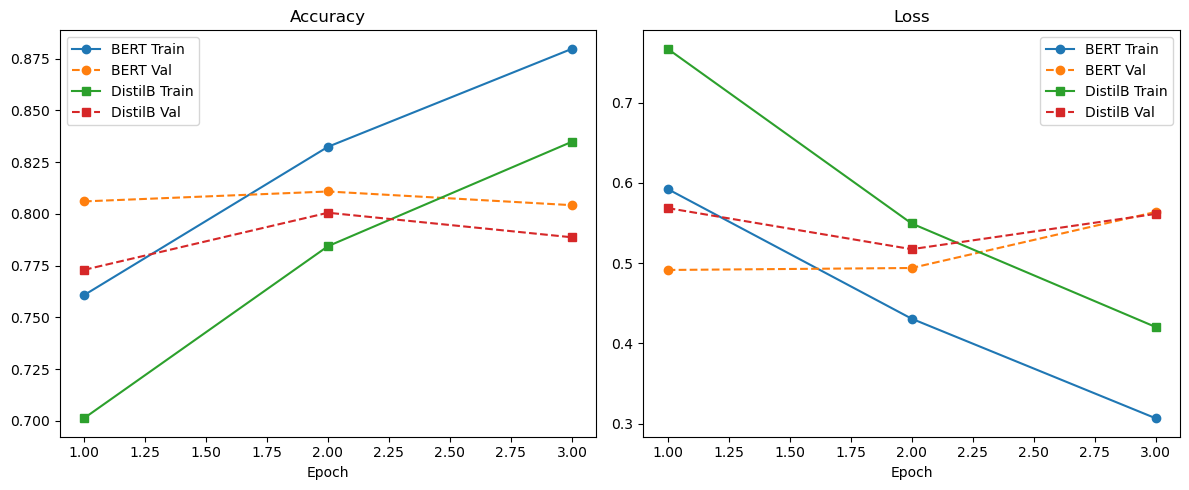

BERT Base Model -> Loss: 0.5636 | Accuracy: 0.8042
DistilBERT Model -> Loss: 0.5612 | Accuracy: 0.7887


In [8]:
# Install required libraries
!pip install --quiet transformers tensorflow datasets

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertModel, TFDistilBertModel

# --------------------------------------------------------------------
# 1. Parameters & Data Prep
# --------------------------------------------------------------------
MAX_LEN    = 128
BATCH_SIZE = 32
EPOCHS     = 3

# assume df has columns 'text' and 'airline_sentiment'
texts = df['text'].tolist()
labels = LabelEncoder().fit_transform(df['airline_sentiment'])
num_classes = len(np.unique(labels))

# train/test split
X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    texts, labels, test_size=0.3, stratify=labels, random_state=42
)

# --------------------------------------------------------------------
# 2. Tokenization Function
# --------------------------------------------------------------------
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_texts(texts, max_len=MAX_LEN):
    """
    Tokenize & encode a list of texts for BERT input.
    Returns two tensors: input_ids and attention_mask.
    """
    encodings = tokenizer(
        texts,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return encodings['input_ids'], encodings['attention_mask']

# encode train & test
train_ids, train_masks = encode_texts(X_train_texts)
test_ids,  test_masks  = encode_texts(X_test_texts)

# pack into tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_ids, 'attention_mask': train_masks},
    tf.keras.utils.to_categorical(y_train, num_classes)
)).shuffle(10000).batch(BATCH_SIZE).prefetch(2)

test_ds = tf.data.Dataset.from_tensor_slices((
    {'input_ids': test_ids, 'attention_mask': test_masks},
    tf.keras.utils.to_categorical(y_test, num_classes)
)).batch(BATCH_SIZE).prefetch(2)

# --------------------------------------------------------------------
# 3. Build & Compile Models
# --------------------------------------------------------------------
def build_bert_model(pretrained_model_name='bert-base-uncased'):
    """
    Build a text classification model on top of a pretrained BERT encoder.
    """
    bert_encoder = TFBertModel.from_pretrained(pretrained_model_name)
    input_ids    = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_ids')
    mask         = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name='attention_mask')
    
    # Get BERT embeddings
    bert_outputs = bert_encoder(input_ids, attention_mask=mask)
    cls_token    = bert_outputs.last_hidden_state[:, 0, :]             # [CLS] token
    x            = tf.keras.layers.Dropout(0.3)(cls_token)
    out          = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=[input_ids, mask], outputs=out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def build_distilbert_model():
    """
    Build a text classification model on top of a pretrained DistilBERT encoder.
    """
    distil_encoder = TFDistilBertModel.from_pretrained('distilbert-base-uncased')
    input_ids      = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_ids')
    mask           = tf.keras.layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name='attention_mask')
    
    distil_outputs = distil_encoder(input_ids, attention_mask=mask)
    cls_token      = distil_outputs.last_hidden_state[:, 0, :]
    x              = tf.keras.layers.BatchNormalization()(cls_token)
    x              = tf.keras.layers.Dropout(0.3)(x)
    x              = tf.keras.layers.Dense(64, activation='relu')(x)
    out            = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=[input_ids, mask], outputs=out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

bert_model      = build_bert_model()
distilbert_model= build_distilbert_model()

# --------------------------------------------------------------------
# 4. Train & Plot Metrics
# --------------------------------------------------------------------
hist_bert      = bert_model.fit(train_ds, epochs=EPOCHS, validation_data=test_ds)
hist_distilbert= distilbert_model.fit(train_ds, epochs=EPOCHS, validation_data=test_ds)

def plot_history(h1, h2):
    """Plot training & validation accuracy/loss for two models."""
    epochs = range(1, EPOCHS+1)
    plt.figure(figsize=(12,5))
    
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(epochs, h1.history['accuracy'],    'o-', label='BERT Train')
    plt.plot(epochs, h1.history['val_accuracy'],'o--',label='BERT Val')
    plt.plot(epochs, h2.history['accuracy'],    's-', label='DistilB Train')
    plt.plot(epochs, h2.history['val_accuracy'],'s--',label='DistilB Val')
    plt.title('Accuracy'); plt.xlabel('Epoch'); plt.legend()
    
    # Loss
    plt.subplot(1,2,2)
    plt.plot(epochs, h1.history['loss'],    'o-', label='BERT Train')
    plt.plot(epochs, h1.history['val_loss'],'o--',label='BERT Val')
    plt.plot(epochs, h2.history['loss'],    's-', label='DistilB Train')
    plt.plot(epochs, h2.history['val_loss'],'s--',label='DistilB Val')
    plt.title('Loss'); plt.xlabel('Epoch'); plt.legend()
    
    plt.tight_layout(); plt.show()

plot_history(hist_bert, hist_distilbert)

# --------------------------------------------------------------------
# 5. Evaluate & Print Final Metrics
# --------------------------------------------------------------------
def evaluate(model, dataset, name):
    loss, acc = model.evaluate(dataset, verbose=0)
    print(f"{name} -> Loss: {loss:.4f} | Accuracy: {acc:.4f}")

evaluate(bert_model, test_ds,       "BERT Base Model")
evaluate(distilbert_model, test_ds, "DistilBERT Model")


In [11]:
from transformers import TFBertModel

def save_bert_encoder(model: TFBertModel, path: str = 'bert_encoder_model'):
    try:
        model.save_pretrained(path)
        print(f"✅ BERT encoder saved to {path}")
    except Exception as e:
        print(f"Error during saving: {e}")


In [12]:
bert_encoder = TFBertModel.from_pretrained("bert-base-uncased")
bert_encoder.trainable = False
save_bert_encoder(bert_encoder)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

✅ BERT encoder saved to bert_encoder_model


In [13]:
from transformers import TFBertModel

def load_bert_encoder(path: str = 'bert_encoder_model') -> TFBertModel:
    try:
        model = TFBertModel.from_pretrained(path)
        print(f"✅ BERT encoder loaded from {path}")
        return model
    except Exception as e:
        print(f"Error during loading: {e}")
        return None


In [14]:
from transformers import BertTokenizer
import numpy as np

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def get_embeddings(texts, bert_model, max_len=128):
    try:
        encodings = tokenizer(
            texts,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors='tf'
        )
        outputs = bert_model(encodings['input_ids'], attention_mask=encodings['attention_mask'])
        return outputs.last_hidden_state[:, 0, :].numpy()  # CLS token
    except Exception as e:
        print(f"Embedding error: {e}")
        return np.zeros((len(texts), 768))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Embedding training texts…
639/639 [==============================] - 679s 1s/step
Embedding test texts…
274/274 [==============================] - 271s 986ms/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 768)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32, 128)        │       459,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 934,883 (3.57 MB)

 Trainable params: 932,867 (3.56 MB)

 Non-trainable params: 2,016 (7.88 KB)

Epoch 1/5
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 187s 123ms/step - accuracy: 0.4025 - loss: 1.8220 - val_accuracy: 0.6105 - val_loss: 1.2877
Epoch 2/5
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 141s 117ms/step - accuracy: 0.6271 - loss: 1.3042 - val_accuracy: 0.7430 - val_loss: 1.0431
Epoch 3/5
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 146s 122ms/step - accuracy: 0.7016 - loss: 1.0903 - val_accuracy: 0.7611 - val_loss: 0.8749
Epoch 4/5
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 150s 124ms/step - accuracy: 0.7253 - loss: 0.9279 - val_accuracy: 0.7433 - val_loss: 0.7780
Epoch 5/5
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 168s 140ms/step - accuracy: 0.7383 - loss: 0.7878 - val_accuracy: 0.7168 - val_loss: 0.7828


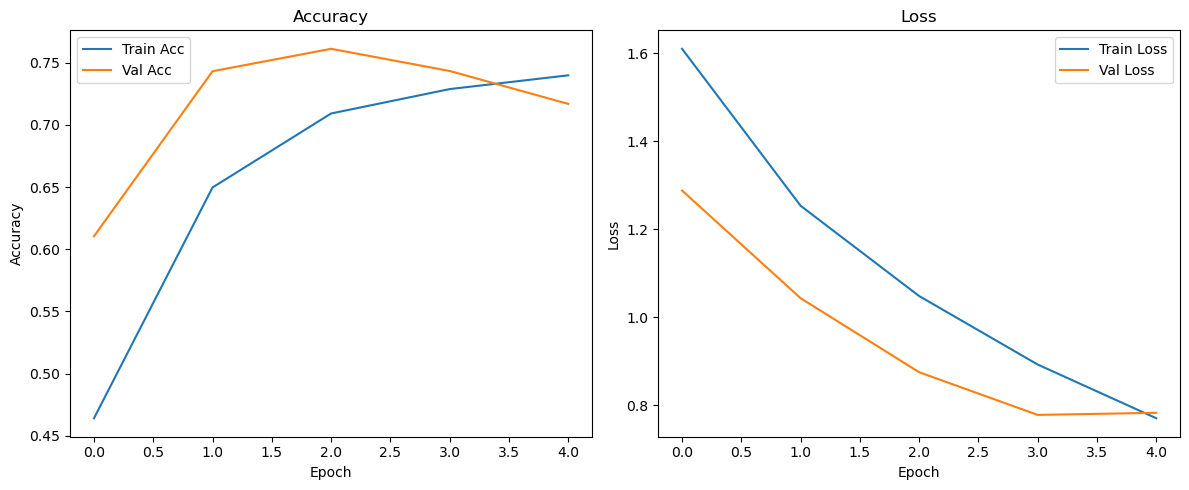

Test Loss: 0.7828 — Test Accuracy: 0.7168


In [8]:
# Install required libraries
!pip install --quiet imbalanced-learn transformers tensorflow

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, TFBertModel

# -----------------------------------------------------------------------------
# 1. PARAMETERS & DATA
# -----------------------------------------------------------------------------
MAX_LEN    = 32        # shorten sequence length for SMOTE tractability
BATCH_SIZE = 16
EPOCHS     = 5

texts = df['text'].tolist()
labels = LabelEncoder().fit_transform(df['airline_sentiment'])
num_classes = len(np.unique(labels))

# Train/test split for embedding extraction
X_txt_tr, X_txt_te, y_tr, y_te = train_test_split(
    texts, labels, test_size=0.3, stratify=labels, random_state=42
)

# -----------------------------------------------------------------------------
# 2. TOKENIZE & EMBED WITH BERT
# -----------------------------------------------------------------------------
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
bert_encoder.trainable = False  # freeze BERT

def batch_embed(texts, batch_size=BATCH_SIZE):
    input_ids, masks = [], []
    for txt in texts:
        enc = tokenizer(txt, max_length=MAX_LEN, padding='max_length',
                        truncation=True, return_tensors='np')
        input_ids.append(enc['input_ids'][0])
        masks.append(enc['attention_mask'][0])
    input_ids = np.array(input_ids)
    masks     = np.array(masks)
    outputs   = bert_encoder.predict({'input_ids': input_ids, 'attention_mask': masks},
                                     batch_size=batch_size)
    # take full sequence embeddings
    return outputs.last_hidden_state  # shape (n_samples, MAX_LEN, 768)

print("Embedding training texts…")
X_emb_tr = batch_embed(X_txt_tr)  # (n_tr, MAX_LEN, 768)

# -----------------------------------------------------------------------------
# 3. FLATTEN & SMOTE
# -----------------------------------------------------------------------------
n_tr, L, H = X_emb_tr.shape
X_flat = X_emb_tr.reshape(n_tr, L*H)               # (n_tr, MAX_LEN*768)
sm    = SMOTE(random_state=42, n_jobs=-1)
X_res, y_res = sm.fit_resample(X_flat, y_tr)       # oversampled flat features

# reshape back to sequences
n_res = X_res.shape[0]
X_res_seq = X_res.reshape(n_res, L, H)             # (n_res, MAX_LEN, 768)

# also prepare test embeddings
print("Embedding test texts…")
X_emb_te = batch_embed(X_txt_te)                   # (n_te, MAX_LEN, 768)

# -----------------------------------------------------------------------------
# 4. BUILD & TRAIN LSTM + DENSE MODEL
# -----------------------------------------------------------------------------
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input, LSTM, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model

def build_model(input_shape, num_classes):
    inp = Input(shape=input_shape)  # (MAX_LEN, 768)
    x   = inp
    # 4 stacked LSTM layers
    for i in range(4):
        return_seq = True if i < 3 else False
        x = LSTM(128, return_sequences=return_seq)(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
    # 5 dense layers with L2, BN, dropout
    for units in [256, 128, 64, 32, 16]:
        x = Dense(units,
                  activation='relu',
                  kernel_regularizer=regularizers.l2(1e-3))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='softmax')(x)
    model = Model(inp, out)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model((MAX_LEN, H), num_classes)
model.summary()

# train on oversampled embeddings
history = model.fit(X_res_seq, y_res,
                    validation_data=(X_emb_te, y_te),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

# -----------------------------------------------------------------------------
# 5. PLOT TRAINING METRICS
# -----------------------------------------------------------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],    label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],    label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 6. FINAL EVALUATION
# -----------------------------------------------------------------------------
loss, acc = model.evaluate(X_emb_te, y_te, verbose=0)
print(f"Test Loss: {loss:.4f} — Test Accuracy: {acc:.4f}")


Epoch 1/5
602/602 ━━━━━━━━━━━━━━━━━━━━ 115s 151ms/step - accuracy: 0.4639 - loss: 1.8292 - val_accuracy: 0.7079 - val_loss: 1.3527
Epoch 2/5
602/602 ━━━━━━━━━━━━━━━━━━━━ 87s 145ms/step - accuracy: 0.6779 - loss: 1.2916 - val_accuracy: 0.6682 - val_loss: 1.2720
Epoch 3/5
602/602 ━━━━━━━━━━━━━━━━━━━━ 143s 146ms/step - accuracy: 0.7420 - loss: 1.1022 - val_accuracy: 0.5977 - val_loss: 1.3036
Epoch 4/5
602/602 ━━━━━━━━━━━━━━━━━━━━ 140s 144ms/step - accuracy: 0.7789 - loss: 0.9449 - val_accuracy: 0.7558 - val_loss: 0.9145
Epoch 5/5
602/602 ━━━━━━━━━━━━━━━━━━━━ 83s 138ms/step - accuracy: 0.8033 - loss: 0.7914 - val_accuracy: 0.7036 - val_loss: 0.9687


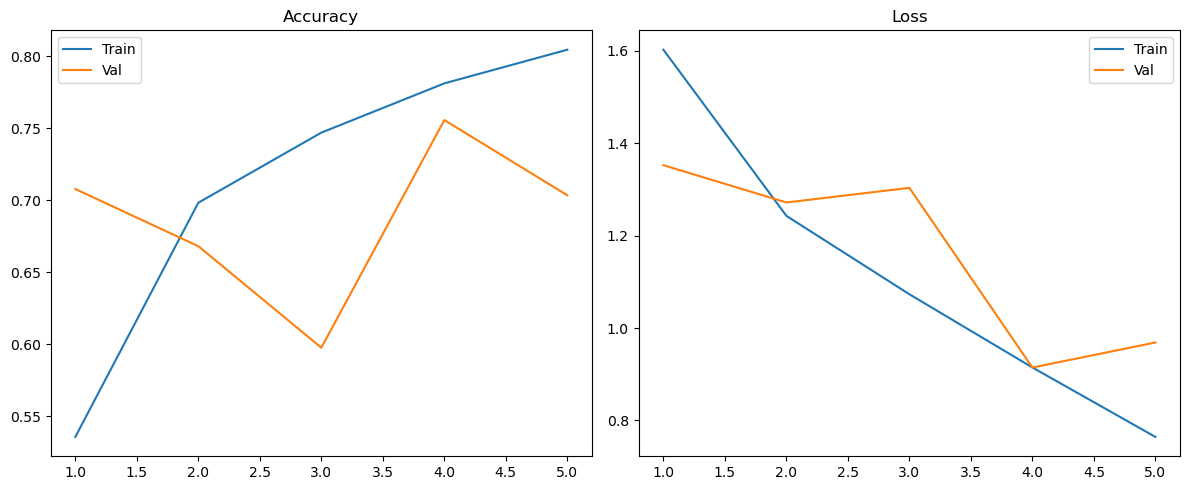

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import tensorflow as tf


def build_bilstm(input_shape, num_classes):
    inp = Input(shape=input_shape)
    x = Bidirectional(LSTM(128, return_sequences=True))(inp)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Bidirectional(LSTM(128))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    for units in [256, 128, 64, 32, 16]:
        x = Dense(units, activation='relu', kernel_regularizer=regularizers.l2(1e-3))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='softmax')(x)
    model = Model(inp, out)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_metrics(history):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Train')
    plt.plot(epochs, history.history['val_accuracy'], label='Val')
    plt.title('Accuracy'); plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Train')
    plt.plot(epochs, history.history['val_loss'], label='Val')
    plt.title('Loss'); plt.legend()
    plt.tight_layout(); plt.show()

# train and save
try:
    model = build_bilstm((MAX_LEN, 768), num_classes)
    history = model.fit(X_res_seq, y_res, validation_data=(X_emb_te, y_te), epochs=5, batch_size=32)
    plot_metrics(history)
    model.save('bilstm_model.h5')
except Exception as e:
    print(f"Training error: {e}")
